In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

#### 1.0 一个简单的神经元
$ a $ 是数据

$ w $ 是参数

$ b $ 是偏置项

In [4]:
a1 = 0.9
a2 = 0.5
a3 = 0.7

w1 = 0.8
w2 = -0.4
w3 = 0

b1 = 1.0

sum1 = a1*w1 + a2*w2 + a3*w3+b1
sum1

1.52

#### 1.1 向量计算

In [5]:
inputs = np.array([a1,a2,a3])
weights = np.array([[w1]
                    ,[w2]
                    ,[w3]])

np.dot(inputs,weights)+b1

array([1.52])

#### 1.2 激活函数

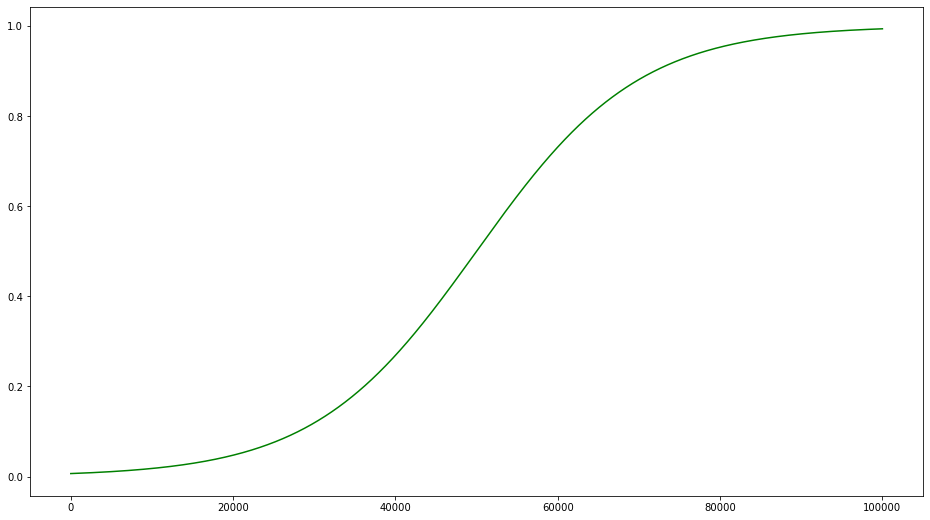

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

cases = np.arange(-5,5,0.0001)
plt.figure(figsize=(16,9))
plt.plot(sigmoid(cases),c='g')
# plt.plot(cases,c='r')


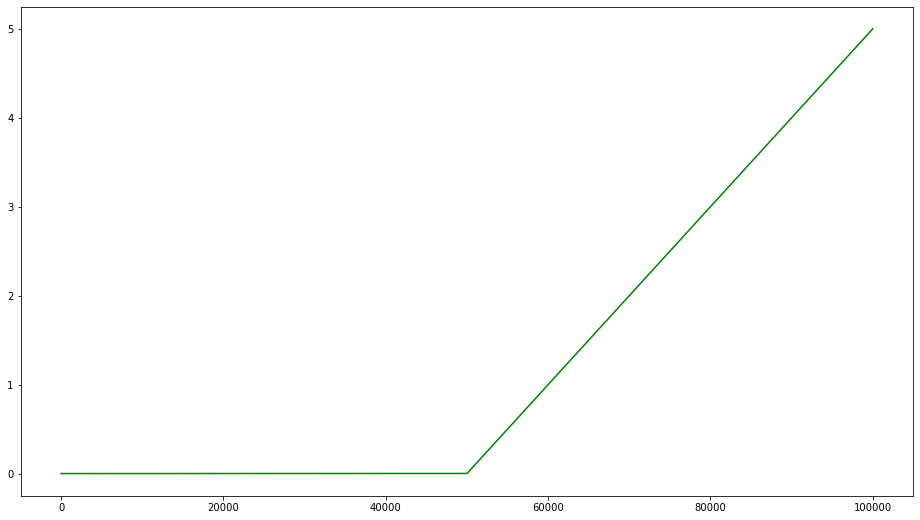

In [7]:
# def activation_Relu(x):
#     bool_index = x <= 0
#     return np.where(bool_index,0,x) 

def activation_Relu(inputs):
    return np.maximum(0,inputs) 

plt.figure(figsize=(16,9))
plt.plot(activation_Relu(cases),c='g')

#### 2.0 再加一个神经元

In [8]:
a1 = 0.9
a2 = 0.5
a3 = 0.7

w01 = 0.8
w02 = -0.4
w03 = 0

w11 = 0.7
w12 = -0.6
w13 = 0.2

b1 = 0.5

inputs = np.array([a1,a2,a3])
weights = np.array([[w01,w11]
                    ,[w02,w12]
                    ,[w03,w13]])


np.dot(inputs,weights)+b1

array([1.02, 0.97])

#### 3.0 batch 批数据

In [9]:
a01 = 0.9
a02 = 0.5
a03 = 0.7

a11 = -0.8
a12 = -0.5
a13 = -0.1

a21 = 0.1
a22 = 0.6
a23 = 0.7

w01 = 0.8
w02 = -0.4
w03 = 0

w11 = -0.7
w12 = -0.6
w13 = 0.2

b1 = 0.5

inputs = np.array(
    [
        [a01,a02,a03]
        ,[a11,a12,a13]
        ,[a21,a22,a23]
    ]
)

weights = np.array([[w01,w11]
                    ,[w02,w12]
                    ,[w03,w13]])

def activation_Relu(inputs):
    return np.maximum(0,inputs) 

activation_Relu(np.dot(inputs,weights)+b1)

array([[1.02, 0.  ],
       [0.06, 1.34],
       [0.34, 0.21]])

#### 4.0 自动权重生成函数

In [10]:
a01 = 0.9
a02 = 0.5
a03 = 0.7

a11 = -0.8
a12 = -0.5
a13 = -0.1

a21 = 0.1
a22 = 0.6
a23 = 0.7

inputs = np.array(
    [
        [a01,a02,a03]
        ,[a11,a12,a13]
        ,[a21,a22,a23]
    ]
)

b1 = np.array([-100,100])

def activation_Relu(inputs):
    return np.maximum(0,inputs) 

def create_weights(n_inputs,n_neurons):
    return np.random.randn(n_inputs,n_neurons)


n_inputs = inputs.shape[0]
weights = create_weights(n_inputs,2)

print(f"weights:{weights}")

activation_Relu(np.dot(inputs,weights)+b1)

weights:[[-1.03276792  0.29884566]
 [ 0.08582515  0.15261513]
 [-1.93469018 -0.55864796]]


array([[ 0.        , 99.95421509],
       [ 0.        , 99.7404807 ],
       [ 0.        , 99.73040007]])

#### 5.0 自动生成权重

In [11]:
a01 = 0.9
a02 = 0.5
a03 = 0.7

a11 = -0.8
a12 = -0.5
a13 = -0.1

a21 = 0.1
a22 = 0.6
a23 = 0.7

inputs = np.array(
    [
        [a01,a02,a03]
        ,[a11,a12,a13]
        ,[a21,a22,a23]
    ]
)

def activation_Relu(inputs):
    return np.maximum(0,inputs) 

def create_weights(n_inputs,n_neurons):
    return np.random.randn(n_inputs,n_neurons)


def create_biases(n_neurons):
    return np.random.randn(n_neurons)


n_neurons = 4
n_inputs = inputs.shape[0]
weights = create_weights(n_inputs,n_neurons)
biases = create_biases(n_neurons)

print(f"weights:\n{weights}")
print(f"biases:\n{biases}")

activation_Relu(np.dot(inputs,weights)+biases)

weights:
[[ 0.09610332  0.25092388  0.2032724  -2.43181448]
 [-0.91268347 -1.41041437 -0.46860772 -1.20992068]
 [-0.29997954 -2.39836377  0.71612822 -0.47235809]]
biases:
[-0.2118375  -2.39281633 -0.60985971 -1.38812506]


array([[0.        , 0.        , 0.        , 0.        ],
       [0.19761954, 0.        , 0.        , 1.20952268],
       [0.        , 0.        , 0.        , 0.        ]])

#### 6.0 多层神经网络搭建

In [12]:
a01 = 0.9
a02 = 0.5
a03 = 0.7

a11 = -0.8
a12 = -0.5
a13 = 0.6

a21 = 0.1
a22 = -0.6
a23 = -0.5


a31 = 0.1
a32 = -0.6
a33 = 0.1


a41 = -0.1
a42 = 0.6
a43 = 0

# inputs = np.array(
#     [
#         [a01,a02,a03]
#         ,[a11,a12,a13]
#         ,[a21,a22,a23]
#         ,[a31,a32,a33]
#         ,[a41,a42,a43]
#     ]
# )

inputs = np.array(
    [
        [a01,a02]
        ,[a11,a12]
        ,[a21,a22]
        ,[a31,a32]
        ,[a41,a42]
    ]
)


def activation_Relu(inputs):
    return np.maximum(0,inputs) 

def create_weights(n_inputs,n_neurons):
    return np.random.randn(n_inputs,n_neurons)


def create_biases(n_neurons):
    return np.random.randn(n_neurons)



_,n_inputs = inputs.shape
print(n_inputs)

# 第一层
# n_neurons = 4
weights0 = create_weights(n_inputs,3)
biases0 = create_biases(3)
# 第二层
weights1 = create_weights(3,4)
biases1 = create_biases(4)
# 第三层
weights2 = create_weights(4,2)
biases2 = create_biases(2)

# 第一层运算

# print(inputs.shape,weights0.shape)

sum0 = np.dot(inputs,weights0)+biases0 
output0 = activation_Relu(sum0)
print(output0)
# 第二层运算
sum1 = np.dot(output0,weights1)+biases1
output1 = activation_Relu(sum1)
# output1
print(output1)
sum2 = np.dot(output1,weights2)+biases2
output2 = activation_Relu(sum2)
print(output2)
output2

2
[[0.         0.         1.43755111]
 [0.         2.14299397 3.95871555]
 [0.         0.54198248 2.47129952]
 [0.         0.54198248 2.47129952]
 [0.         0.90932853 3.08754028]]
[[3.08996572 0.         2.6553212  0.86967731]
 [5.97074024 0.         2.60028512 2.69819456]
 [4.26983411 0.         3.26539119 1.58255843]
 [4.26983411 0.         3.26539119 1.58255843]
 [4.97335516 0.         3.54591114 2.01236833]]
[[5.14128935 0.        ]
 [2.65195338 0.        ]
 [5.53898666 0.        ]
 [5.53898666 0.        ]
 [5.58962282 0.        ]]


array([[5.14128935, 0.        ],
       [2.65195338, 0.        ],
       [5.53898666, 0.        ],
       [5.53898666, 0.        ],
       [5.58962282, 0.        ]])

#### 7.0 面向对象的方式实现神经网络的层

In [13]:
a01 = 0.9
a02 = 0.5
a03 = 0.7

a11 = -0.8
a12 = -0.5
a13 = 0.6

a21 = 0.1
a22 = -0.6
a23 = -0.5


a31 = 0.1
a32 = -0.6
a33 = 0.1


a41 = -0.1
a42 = 0.6
a43 = 0

# inputs = np.array(
#     [
#         [a01,a02,a03]
#         ,[a11,a12,a13]
#         ,[a21,a22,a23]
#         ,[a31,a32,a33]
#         ,[a41,a42,a43]
#     ]
# )

inputs = np.array(
    [
        [a01,a02]
        ,[a11,a12]
        ,[a21,a22]
        ,[a31,a32]
        ,[a41,a42]
    ]
)


def activation_Relu(inputs):
    return np.maximum(0,inputs) 

def create_weights(n_inputs,n_neurons):
    return np.random.randn(n_inputs,n_neurons)


def create_biases(n_neurons):
    return np.random.randn(n_neurons)


class Layer:
    def __init__(self,n_inputs,n_neurons):
        self.n_neurons = n_neurons
        self.n_inputs = n_inputs 
        self.weights = np.random.randn(self.n_inputs,self.n_neurons)
        self.biases = np.random.randn(self.n_neurons)
    
    def layer_forward(self,inputs):
        sum_ = np.dot(inputs,self.weights)+self.biases
        self.output = activation_Relu(sum_)
        self.next_n_input = self.output.shape[-1]
        return self.output


layer0 = Layer(n_inputs=2,n_neurons=3)
layer1 = Layer(n_inputs=3,n_neurons=4)
layer3 = Layer(n_inputs=4,n_neurons=2)
output0 = layer0.layer_forward(inputs)
print(f"output0:\n{output0}")
print(layer0.next_n_input)
output1 = layer1.layer_forward(output0)
print(f"output0:\n{output1}")
print(layer1.next_n_input)

print(f"output2:{output2}")




output0:
[[0.89587891 0.         0.20693628]
 [1.76659228 0.         0.        ]
 [2.08778386 0.         0.        ]
 [2.08778386 0.         0.        ]
 [0.55280693 0.         0.14612258]]
3
output0:
[[2.27272461 0.         0.         1.08825292]
 [3.18788098 1.30788589 0.         1.17699903]
 [3.6217002  1.76991284 0.         1.23270904]
 [3.6217002  1.76991284 0.         1.23270904]
 [1.73268675 0.         0.         1.01044596]]
4
output2:[[5.14128935 0.        ]
 [2.65195338 0.        ]
 [5.53898666 0.        ]
 [5.53898666 0.        ]
 [5.58962282 0.        ]]


#### 7.1 另一种搭建方式，自动推理下一层n_input的参数

In [14]:
a01 = 0.9
a02 = 0.5
a03 = 0.7

a11 = -0.8
a12 = -0.5
a13 = 0.6

a21 = 0.1
a22 = -0.6
a23 = -0.5


a31 = 0.1
a32 = -0.6
a33 = 0.1


a41 = -0.1
a42 = 0.6
a43 = 0

# inputs = np.array(
#     [
#         [a01,a02,a03]
#         ,[a11,a12,a13]
#         ,[a21,a22,a23]
#         ,[a31,a32,a33]
#         ,[a41,a42,a43]
#     ]
# )

inputs = np.array(
    [
        [a01,a02]
        ,[a11,a12]
        ,[a21,a22]
        ,[a31,a32]
        ,[a41,a42]
    ]
)


def activation_Relu(inputs):
    return np.maximum(0,inputs) 

def create_weights(n_inputs,n_neurons):
    return np.random.randn(n_inputs,n_neurons)


def create_biases(n_neurons):
    return np.random.randn(n_neurons)


class Layer:
    def __init__(self,n_inputs,n_neurons):
        self.n_neurons = n_neurons
        self.n_inputs = n_inputs 
        self.weights = np.random.randn(self.n_inputs,self.n_neurons)
        self.biases = np.random.randn(self.n_neurons)
    
    def layer_forward(self,inputs):
        sum_ = np.dot(inputs,self.weights)+self.biases
        self.output = activation_Relu(sum_)
        self.next_n_input = self.output.shape[-1]
        return self.output

    
n_inputs = inputs.shape[-1]
layer0 = Layer(n_inputs=n_inputs,n_neurons=3)
output0 = layer0.layer_forward(inputs)
layer1 = Layer(n_inputs=layer0.next_n_input,n_neurons=10)
output1 = layer1.layer_forward(output0)
layer3 = Layer(n_inputs=layer1.next_n_input,n_neurons=2)
output2 = layer3.layer_forward(output1)
output2

array([[0.        , 0.        ],
       [0.        , 4.22801282],
       [0.        , 4.18199649],
       [0.        , 4.18199649],
       [0.        , 1.86193805]])

#### 8 建立面向对象的网络

In [15]:
a01 = 0.9
a02 = 0.5
a03 = 0.7

a11 = -0.8
a12 = -0.5
a13 = 0.6

a21 = 0.1
a22 = -0.6
a23 = -0.5


a31 = 0.1
a32 = -0.6
a33 = 0.1


a41 = -0.1
a42 = 0.6
a43 = 0

# inputs = np.array(
#     [
#         [a01,a02,a03]
#         ,[a11,a12,a13]
#         ,[a21,a22,a23]
#         ,[a31,a32,a33]
#         ,[a41,a42,a43]
#     ]
# )

inputs = np.array(
    [
        [a01,a02]
        ,[a11,a12]
        ,[a21,a22]
        ,[a31,a32]
        ,[a41,a42]
    ]
)


def activation_Relu(inputs):
    """
    Relu激活函数
    """
    return np.maximum(0,inputs) 

def activation_softmax(inputs):
    """
    softmax 激活函数
    """
    max_values = np.max(inputs,axis=1,keepdims=True)
    slided_input = inputs-max_values
    exp_value = np.exp(slided_input)
    norm_base = np.sum(exp_value,axis=1,keepdims=True)
    return exp_value/norm_base
    
    
def create_weights(n_inputs,n_neurons):
    """
    创建权重
    """
    return np.random.randn(n_inputs,n_neurons)

def create_biases(n_neurons):
    """
    创建偏置
    """
    return np.random.randn(n_neurons)


class Layer:
    def __init__(self,n_inputs,n_neurons):
        self.n_neurons = n_neurons
        self.n_inputs = n_inputs 
        self.weights = np.random.randn(self.n_inputs,self.n_neurons)
        self.biases = np.random.randn(self.n_neurons)
    
    def layer_forward(self,inputs):
        sum_ = np.dot(inputs,self.weights)+self.biases
#         self.output = activation_Relu(sum_)
#         self.next_n_input = self.output.shape[-1]
#         return self.output
        return sum_

class Network:
    def __init__(self,network_shape:list):
        self.shape = network_shape
        self.layers = []
        self.neurons = []
        for i in range(len(network_shape)-1):
            n_inputs = network_shape[i]
            n_neurons = network_shape[i+1]
            layer = Layer(n_inputs,n_neurons)
            self.layers.append(layer)
            self.neurons.append(n_neurons)
    
    ## 前馈网络
    def network_forward(self,inputs):
        outputs = [inputs]
        layer_lenght = len(self.layers) 
        for i in range(layer_lenght):
            layer_sum = self.layers[i].layer_forward(outputs[i])
            if i < layer_lenght:
                # 前期用Rule函数激活
                layer_output = activation_Relu(layer_sum)
            else:
                ## 最后一行用softmax函数激活
                layer_output = activation_softmax(layer_sum)
            outputs.append(layer_output)
        return outputs
            




n_inputs = inputs.shape[-1]
# 定义神经网络的层，第一个数要与输入的批次相同
NETWORK_SHAPE = [n_inputs,10,10,2]
# 建立一个网络
network = Network(NETWORK_SHAPE)
print(f"每层网络用了多少个神经元：{network.neurons}，一共用了几层网络：{len(network.neurons)}")
# 建立前馈网络
network.network_forward(inputs)

# # layer0 = Layer(n_inputs=n_inputs,n_neurons=3)
# output0 = network.layers[0].layer_forward(inputs)
# # layer1 = Layer(n_inputs=layer0.next_n_input,n_neurons=10)
# output1 = network.layers[1].layer_forward(output0)
# # layer3 = Layer(n_inputs=layer1.next_n_input,n_neurons=2)
# output2 =  network.layers[2].layer_forward(output1)
# output2


# network.layers[0].weights
# network.layers[1].weights
# network.layers[2].weights

每层网络用了多少个神经元：[10, 10, 2]，一共用了几层网络：3


[array([[ 0.9,  0.5],
        [-0.8, -0.5],
        [ 0.1, -0.6],
        [ 0.1, -0.6],
        [-0.1,  0.6]]),
 array([[0.06065023, 0.        , 0.68927425, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.16093139, 0.        ],
        [0.23347889, 0.        , 0.        , 1.33973835, 0.        ,
         0.        , 0.        , 0.        , 0.07395548, 0.        ],
        [0.95232958, 0.        , 0.        , 0.13119858, 0.        ,
         0.        , 0.        , 0.        , 0.81018818, 0.        ],
        [0.95232958, 0.        , 0.        , 0.13119858, 0.        ,
         0.        , 0.        , 0.        , 0.81018818, 0.        ],
        [0.        , 0.        , 0.        , 0.50644783, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ]]),
 array([[0.        , 0.        , 0.        , 0.        , 1.34345689,
         1.16479621, 0.        , 0.14607644, 0.        , 0.30368582],
        [0.        , 1.08301668, 0.        , 2.14768

#### 9.0 标准化输出防止神经元值爆炸

In [16]:
a01 = 0.9
a02 = 0.5
a03 = 0.7

a11 = -0.8
a12 = -0.5
a13 = 0.6

a21 = 0
a22 = 0
a23 = -0.5


a31 = 0.1
a32 = -0.6
a33 = 0.1


a41 = -0.1
a42 = 0.6
a43 = 0

# inputs = np.array(
#     [
#         [a01,a02,a03]
#         ,[a11,a12,a13]
#         ,[a21,a22,a23]
#         ,[a31,a32,a33]
#         ,[a41,a42,a43]
#     ]
# )

inputs = np.array(
    [
        [a01,a02]
        ,[a11,a12]
        ,[a21,a22]
        ,[a31,a32]
        ,[a41,a42]
    ]
)


import numpy as np
import math
import random
import matplotlib.pyplot as plt


NUM_OF_DATA = 10

def create_data(num_of_data):
    entry_list = []
    for i in range(num_of_data):
        x = random.uniform(-2,2)
        y = random.uniform(-2,2)
        entry = [x,y]
        entry_list.append(entry)
    return np.array(entry_list)





def activation_Relu(inputs):
    """
    Relu激活函数
    """
    return np.maximum(0,inputs) 

def activation_softmax(inputs):
    """
    softmax 激活函数
    """
    max_values = np.max(inputs,axis=1,keepdims=True)
    slided_input = inputs-max_values
    exp_value = np.exp(slided_input)
    norm_base = np.sum(exp_value,axis=1,keepdims=True)
    return exp_value/norm_base
    
    
def create_weights(n_inputs,n_neurons):
    """
    创建权重
    """
    return np.random.randn(n_inputs,n_neurons)

def create_biases(n_neurons):
    """
    创建偏置
    """
    return np.random.randn(n_neurons)

def normalize(array):
    """
    标准化函数让值永远处于-1，1之间
    """
    abs_number = np.abs(array)
    max_number = np.max(abs_number,axis=1,keepdims=True)
    scale_rate = np.where(max_number==0,1,1/max_number)
    norm = array * scale_rate
    return norm
    

class Layer:
    def __init__(self,n_inputs,n_neurons):
        self.n_neurons = n_neurons
        self.n_inputs = n_inputs 
        self.weights = np.random.randn(self.n_inputs,self.n_neurons)
        self.biases = np.random.randn(self.n_neurons)
    
    def layer_forward(self,inputs):
        sum_ = np.dot(inputs,self.weights)+self.biases
#         self.output = activation_Relu(sum_)
#         self.next_n_input = self.output.shape[-1]
#         return self.output
        return sum_

class Network:
    def __init__(self,network_shape:list):
        self.shape = network_shape
        self.layers = []
        self.neurons = []
        for i in range(len(network_shape)-1):
            # 输入维度m,n的n值
            n_inputs = network_shape[i]
            # 神经元数量
            n_neurons = network_shape[i+1]
            layer = Layer(n_inputs,n_neurons)
            self.layers.append(layer)
            self.neurons.append(n_neurons)
    
    ## 前馈网络
    def network_forward(self,inputs):
        """
        前馈网络
        """
        outputs = [inputs]
        layer_lenght = len(self.layers) 
        for i in range(layer_lenght):
            layer_sum = self.layers[i].layer_forward(outputs[i])
            if i < layer_lenght:
                # 前期用Rule函数激活
                layer_output = activation_Relu(layer_sum)
                # 对输出值标准化，让他永远处于-1，1之间防止爆炸
                layer_output = normalize(layer_output)
                
            else:
                ## 最后一行用softmax函数激活
                layer_output = activation_softmax(layer_sum)
            outputs.append(layer_output)
        return outputs
            




n_inputs = inputs.shape[-1]
# 定义神经网络的层，第一个数要与输入的批次相同
NETWORK_SHAPE = [n_inputs,10,10,2]
# 建立一个网络
network = Network(NETWORK_SHAPE)
print(f"每层网络用了多少个神经元：{network.neurons}，一共用了几层网络：{len(network.neurons)}")
# 建立前馈网络喂数据
network.network_forward(inputs)

# print(inputs)
# normalize(inputs)

每层网络用了多少个神经元：[10, 10, 2]，一共用了几层网络：3


/tmp/ipykernel_1527804/1084068997.py:100: RuntimeWarning: divide by zero encountered in true_divide
  scale_rate = np.where(max_number==0,1,1/max_number)


[array([[ 0.9,  0.5],
        [-0.8, -0.5],
        [ 0. ,  0. ],
        [ 0.1, -0.6],
        [-0.1,  0.6]]),
 array([[0.77295807, 0.31243501, 0.        , 0.        , 1.        ,
         0.27817738, 0.80765308, 0.        , 0.40644473, 0.58527919],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.        , 0.89675761, 0.        ],
        [0.52047817, 0.        , 0.        , 0.        , 0.43733776,
         0.        , 0.        , 0.63110391, 1.        , 0.18893155],
        [1.        , 0.        , 0.        , 0.        , 0.0441236 ,
         0.22675958, 0.        , 0.7471347 , 0.6091434 , 0.        ],
        [0.        , 0.07492611, 0.        , 0.        , 0.72057631,
         0.        , 0.        , 0.16892926, 1.        , 0.4270359 ]]),
 array([[0.        , 0.        , 1.        , 0.        , 0.        ,
         0.19197859, 0.76928085, 0.        , 0.        , 0.36027324],
        [0.        , 0.        , 0.09196094, 0.     

### 10.0 生成数据来运行网络

In [40]:
case = np.random.randn(200,2)+1

activation_softmax(case)

array([[0.66309226, 0.33690774],
       [0.18182713, 0.81817287],
       [0.80675493, 0.19324507],
       [0.267498  , 0.732502  ],
       [0.36622492, 0.63377508],
       [0.20192622, 0.79807378],
       [0.40918147, 0.59081853],
       [0.09918923, 0.90081077],
       [0.16244861, 0.83755139],
       [0.8701176 , 0.1298824 ],
       [0.84780727, 0.15219273],
       [0.28165171, 0.71834829],
       [0.33928655, 0.66071345],
       [0.09032333, 0.90967667],
       [0.37490085, 0.62509915],
       [0.78058461, 0.21941539],
       [0.15543826, 0.84456174],
       [0.71346466, 0.28653534],
       [0.31148156, 0.68851844],
       [0.13640171, 0.86359829],
       [0.56753053, 0.43246947],
       [0.91861255, 0.08138745],
       [0.41111213, 0.58888787],
       [0.94206685, 0.05793315],
       [0.20938186, 0.79061814],
       [0.59900317, 0.40099683],
       [0.10870203, 0.89129797],
       [0.04942118, 0.95057882],
       [0.26686729, 0.73313271],
       [0.59167522, 0.40832478],
       [0.